In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import ace_tools as tools

# Load the two CSV files for analysis

data_dir = './dataset'
dataset = {
    'pdd': f"{data_dir}/PDD.csv",
    'electron_spectrum': f"{data_dir}/electron_spectrum.csv",
}
electron_spectrum_df = pd.read_csv(dataset['electron_spectrum'], index_col=False,  header=None)
pdd_df = pd.read_csv(dataset['pdd'], index_col=False,  header=None)

# Display the first few rows of each DataFrame to understand their structure
print(f"Shape of electron_spectrum datset {electron_spectrum_df.shape}")
print(f"Shape of pdd datset {pdd_df.shape}")

Shape of electron_spectrum datset (2004, 205)
Shape of pdd datset (49, 202)


In [4]:
electron_spectrum_df.head()

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,NaN,1.000000,1.050000,1.100000,1.150000,1.200000,1.250000,1.300000,1.350000,1.400000,...,10.700000,10.750000,10.800000,10.850000,10.900000,10.950000,11.000000,NaN,NaN,NaN
1,0.000,0.000085,0.000091,0.000089,0.000090,0.000088,0.000078,0.000077,0.000081,0.000079,...,0.000039,0.000042,0.000045,0.000045,0.000041,0.000043,0.000043,NaN,NaN,NaN
2,0.006,0.000153,0.000152,0.000151,0.000151,0.000154,0.000167,0.000170,0.000166,0.000162,...,0.000196,0.000195,0.000196,0.000196,0.000196,0.000196,0.000196,NaN,NaN,NaN
3,0.012,0.000191,0.000180,0.000163,0.000159,0.000148,0.000156,0.000157,0.000158,0.000155,...,0.000148,0.000148,0.000148,0.000147,0.000147,0.000148,0.000148,NaN,NaN,NaN
4,0.018,0.000283,0.000280,0.000245,0.000236,0.000211,0.000220,0.000190,0.000200,0.000180,...,0.000120,0.000121,0.000121,0.000121,0.000121,0.000121,0.000121,NaN,NaN,NaN


In [5]:
pdd_df.head()

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
0,NaN,1.000,1.050,1.100,1.150,1.200,1.250,1.300,1.350,1.400,...,10.550,10.600,10.650,10.700,10.750,10.800,10.850,10.900,10.950,11.000
1,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
2,0.091,1.095,1.251,1.362,1.511,1.581,1.652,1.731,1.780,1.812,...,1.157,1.186,1.151,1.148,1.178,1.164,1.155,1.149,1.172,1.170
3,0.181,0.001,0.013,0.042,0.089,0.158,0.277,0.383,0.511,0.632,...,1.231,1.239,1.218,1.213,1.216,1.223,1.234,1.207,1.225,1.222
4,0.226,0.000,0.000,0.000,0.001,0.004,0.014,0.035,0.071,0.130,...,1.239,1.250,1.250,1.269,1.245,1.259,1.259,1.244,1.250,1.255


# Electron Spectrum Data (electron_spectrum.csv)

- The columns represent measurements at different intervals, with the first column as an index and the rest as sequential measurements.

- The dataset appears to contain some columns with "Unnamed" labels at the end, likely empty or containing null values, which we can drop for clarity.

# PDD Data (PDD.csv)

- This dataset follows a similar structure with labeled measurement intervals.

- The first column again serves as an index, with remaining columns holding the data points.

- There are also some trailing "Unnamed" columns that likely need removal.


## Step-by-Step Analysis Approach

1. Data Cleaning: Remove any unnecessary "Unnamed" columns and handle missing values if present.
2. Data Transformation and Aggregation:
- Analyze the trend in measurements across intervals for each dataset.
- Compute summary statistics (mean, standard deviation) to understand the distribution of values.
3. Visualization:
- Plot line graphs for both datasets across the intervals to examine the trend.
- Consider calculating and plotting the difference or ratio between datasets if relevant.
- Insight Exploration: Look for notable trends, anomalies, or correlations between datasets

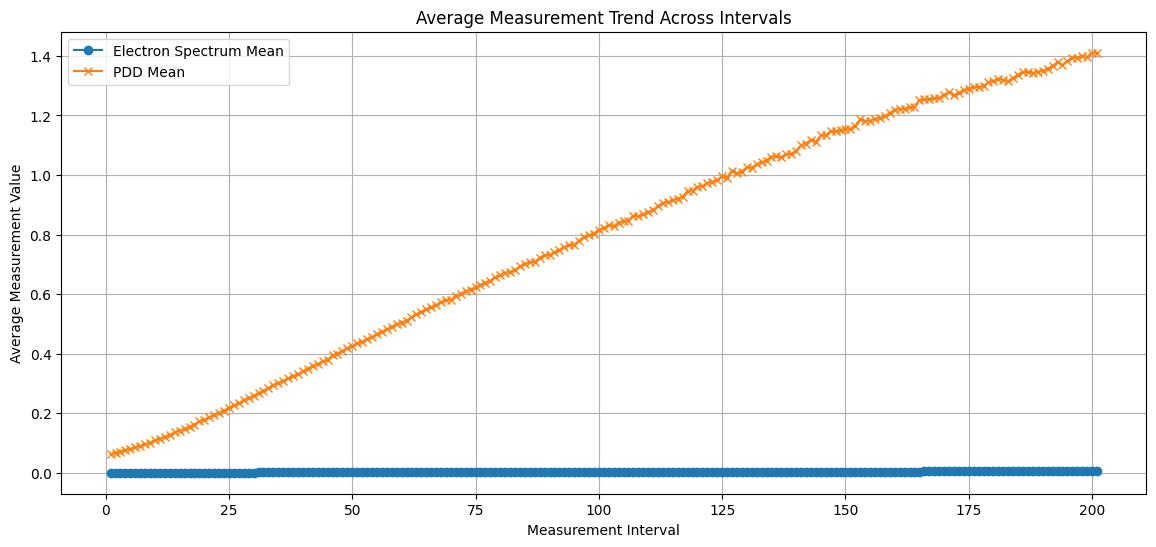

In [7]:


# # Remove unnecessary columns ("Unnamed" columns with null values)
# electron_spectrum_df = electron_spectrum_df.loc[:, ~electron_spectrum_df.columns.str.contains('^Unnamed')]
# pdd_df = pdd_df.loc[:, ~pdd_df.columns.str.contains('^Unnamed')]

# Set the first column as the index in each dataset for clearer plotting
electron_spectrum_df.set_index(electron_spectrum_df.columns[0], inplace=True)
pdd_df.set_index(pdd_df.columns[0], inplace=True)

# Convert columns to numeric to ensure calculations
electron_spectrum_df = electron_spectrum_df.apply(pd.to_numeric, errors='coerce')
pdd_df = pdd_df.apply(pd.to_numeric, errors='coerce')

# Compute summary statistics for both datasets
electron_summary = electron_spectrum_df.describe()
pdd_summary = pdd_df.describe()



# Visualize the trend across intervals in each dataset using line plots
plt.figure(figsize=(14, 6))
plt.plot(electron_spectrum_df.mean(axis=0), label='Electron Spectrum Mean', marker='o')
plt.plot(pdd_df.mean(axis=0), label='PDD Mean', marker='x')
plt.title("Average Measurement Trend Across Intervals")
plt.xlabel("Measurement Interval")
plt.ylabel("Average Measurement Value")
plt.legend()
plt.grid(True)
plt.show()



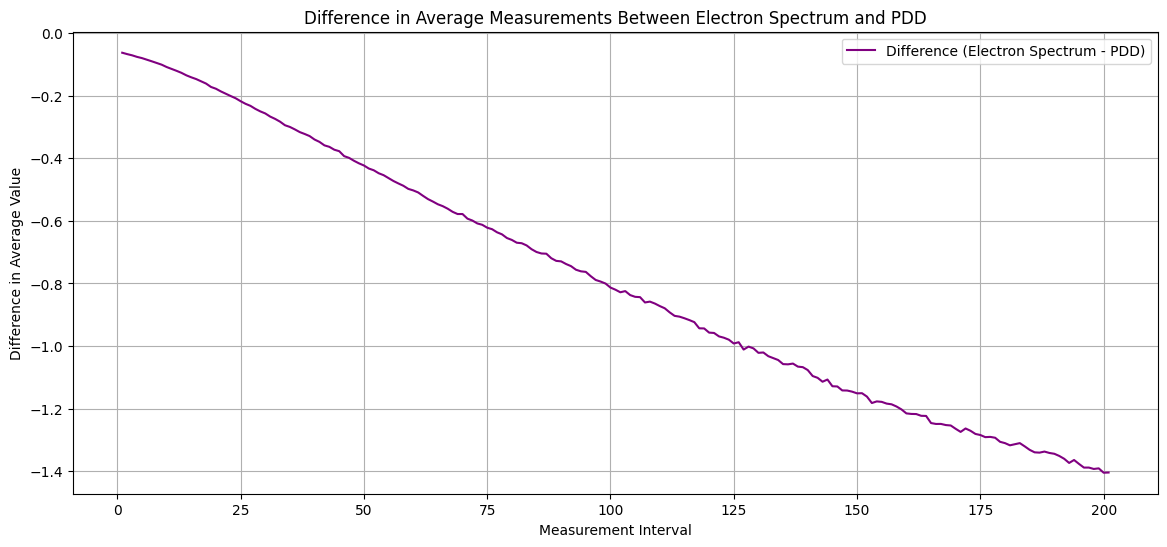

In [8]:
# Explore the difference between the two datasets
difference = electron_spectrum_df.mean(axis=0) - pdd_df.mean(axis=0)

# Plot the difference between the datasets
plt.figure(figsize=(14, 6))
plt.plot(difference, label='Difference (Electron Spectrum - PDD)', color='purple')
plt.title("Difference in Average Measurements Between Electron Spectrum and PDD")
plt.xlabel("Measurement Interval")
plt.ylabel("Difference in Average Value")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
correlation = electron_spectrum_df.mean(axis=0).corr(pdd_df.mean(axis=0))

correlation

0.9971197280921852

In [10]:
# Re-align the datasets and handle missing values by dropping any non-overlapping intervals
# We'll also fill any remaining NaN values with the mean of each dataset as a fallback

# Align both datasets to the same set of intervals by taking the intersection of columns
common_intervals = electron_spectrum_df.columns.intersection(pdd_df.columns)

# Filter both datasets to only the common intervals and fill NaN values with column means
electron_spectrum_aligned = electron_spectrum_df[common_intervals].fillna(electron_spectrum_df.mean(axis=0))
pdd_aligned = pdd_df[common_intervals].fillna(pdd_df.mean(axis=0))

# Compute the correlation between the mean values of aligned intervals
correlation_aligned = electron_spectrum_aligned.mean(axis=0).corr(pdd_aligned.mean(axis=0))
correlation_aligned

0.9971197280921852

In [11]:
# Examine the variance in mean values across intervals for each dataset
electron_mean_variance = electron_spectrum_aligned.mean(axis=0).var()
pdd_mean_variance = pdd_aligned.mean(axis=0).var()

# Display the variances to check if either dataset has very low variance
electron_mean_variance, pdd_mean_variance

(2.1072289684259843e-06, 0.16939729592284308)

In [12]:
# Re-apply a more direct filling strategy by forward and backward filling to handle any residual NaNs
# This ensures a continuous dataset for variance and correlation analysis

electron_spectrum_aligned = electron_spectrum_aligned.fillna(method='ffill').fillna(method='bfill')
pdd_aligned = pdd_aligned.fillna(method='ffill').fillna(method='bfill')

# Re-calculate the variance in the mean values
electron_mean_variance = electron_spectrum_aligned.mean(axis=0).var()
pdd_mean_variance = pdd_aligned.mean(axis=0).var()

# Re-calculate the correlation between the mean values of the two datasets
correlation_aligned = electron_spectrum_aligned.mean(axis=0).corr(pdd_aligned.mean(axis=0))

electron_mean_variance, pdd_mean_variance, correlation_aligned

/tmp/ipykernel_17451/2405696551.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  electron_spectrum_aligned = electron_spectrum_aligned.fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_17451/2405696551.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pdd_aligned = pdd_aligned.fillna(method='ffill').fillna(method='bfill')


(2.1072289684259843e-06, 0.16939729592284308, 0.9971197280921852)

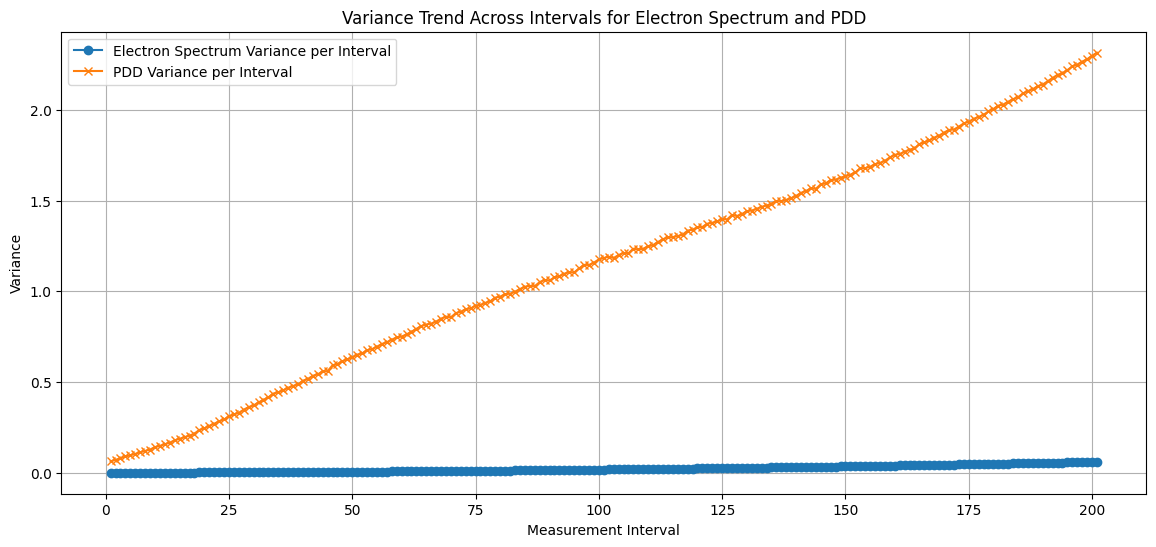

In [13]:
# Calculate the variance across each interval for both datasets to observe trends over intervals
electron_interval_variance = electron_spectrum_aligned.var(axis=0)
pdd_interval_variance = pdd_aligned.var(axis=0)

# Plotting the variance trends for both datasets
plt.figure(figsize=(14, 6))
plt.plot(electron_interval_variance, label='Electron Spectrum Variance per Interval', marker='o')
plt.plot(pdd_interval_variance, label='PDD Variance per Interval', marker='x')
plt.title("Variance Trend Across Intervals for Electron Spectrum and PDD")
plt.xlabel("Measurement Interval")
plt.ylabel("Variance")
plt.legend()
plt.grid(True)
plt.show()

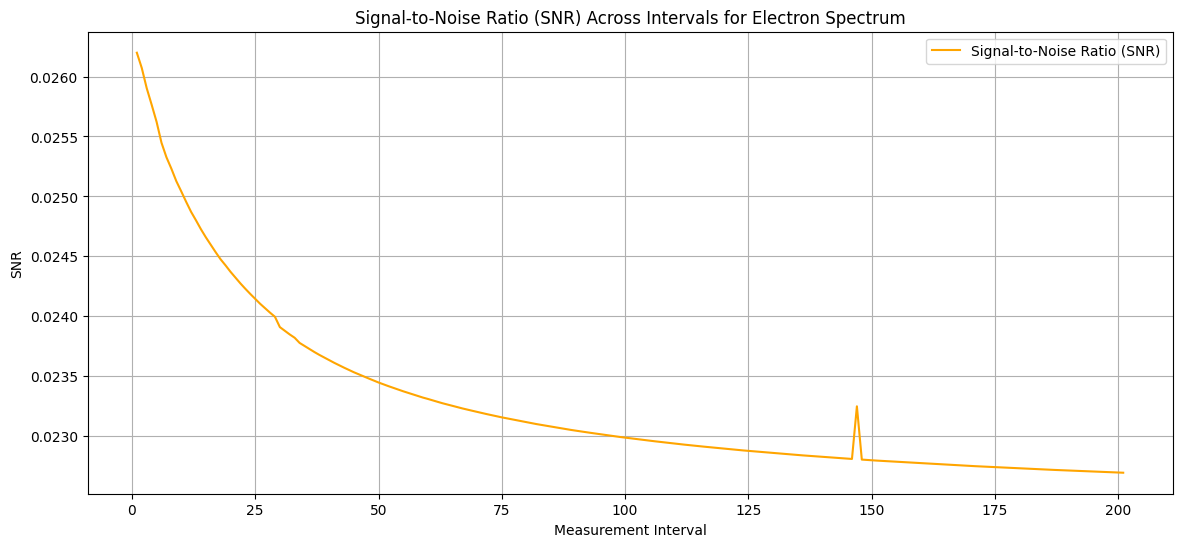

In [15]:
from sklearn.decomposition import PCA

# Signal-to-Noise Ratio (SNR) Calculation for Electron Spectrum
# Assuming signal as mean values and noise as standard deviation over intervals
electron_signal = electron_spectrum_aligned.mean(axis=0)
electron_noise = electron_spectrum_aligned.std(axis=0)
snr = electron_signal / electron_noise

# Plot SNR across intervals
plt.figure(figsize=(14, 6))
plt.plot(snr, label='Signal-to-Noise Ratio (SNR)', color='orange')
plt.title("Signal-to-Noise Ratio (SNR) Across Intervals for Electron Spectrum")
plt.xlabel("Measurement Interval")
plt.ylabel("SNR")
plt.legend()
plt.grid(True)
plt.show()


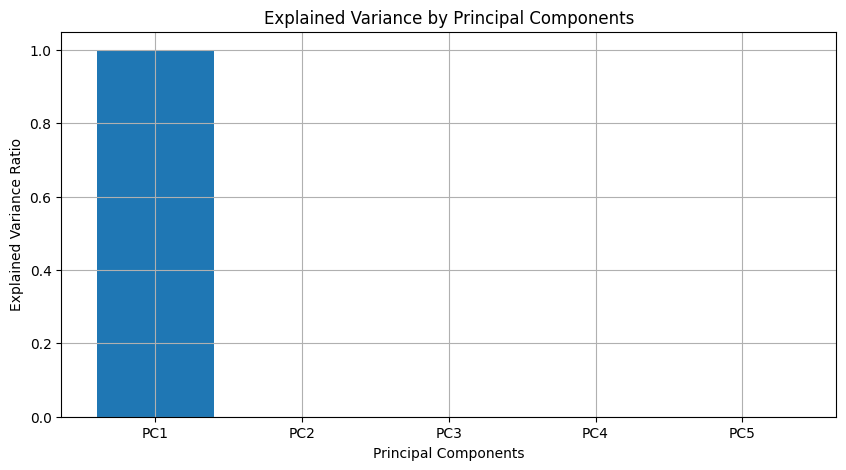

array([[-5.00000569e+00,  3.28273415e-04,  1.52266990e-03,
         1.97369658e-03,  9.00886578e-04],
       [-4.95000659e+00,  3.21887863e-04,  1.22391502e-03,
         1.03563067e-03,  1.85706895e-03],
       [-4.90000678e+00,  3.10971265e-04,  2.19729795e-03,
         1.83153558e-03,  2.06377076e-03],
       [-4.85000697e+00,  3.00172687e-04,  3.14329018e-03,
         2.86591675e-03,  3.38159430e-03],
       [-4.80000704e+00,  2.87967433e-04,  1.78178811e-03,
         4.73946782e-03,  4.97327599e-03]])

In [16]:
# Principal Component Analysis (PCA) on the Electron Spectrum data to capture main components
pca = PCA(n_components=5)  # First 5 components for simplicity
pca_components = pca.fit_transform(electron_spectrum_aligned.T)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Plot explained variance by PCA components
plt.figure(figsize=(10, 5))
plt.bar(range(1, 6), explained_variance, tick_label=[f'PC{i}' for i in range(1, 6)])
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

pca_components[:5]  # Displaying first 5 principal components as example output

# Simple Approach

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

data = torch.tensor(electron_spectrum_aligned.values, dtype=torch.float32)
labels = torch.randint(0, 2, (data.shape[0],))  # Replace with actual labels, e.g., binary or multiclass labels

# Create a DataLoader for batching
dataset = TensorDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define a basic neural network
class SpectrumNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SpectrumNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)  # Assuming a classification task

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.softmax(x)

# Hyperparameters
input_size = data.shape[1]       # Number of intervals in the data
hidden_size = 64                 # Number of neurons in the hidden layer
output_size = 2                  # Number of classes (adjust for your case)

# Initialize model, loss function, and optimizer
model = SpectrumNet(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, target in dataloader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, target)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
    
    # Print loss for each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: nan
Epoch [2/10], Loss: nan
Epoch [3/10], Loss: nan
Epoch [4/10], Loss: nan
Epoch [5/10], Loss: nan
Epoch [6/10], Loss: nan
Epoch [7/10], Loss: nan
Epoch [8/10], Loss: nan
Epoch [9/10], Loss: nan
Epoch [10/10], Loss: nan
